You should have finished watching a video on support vector machines.  This algorithm offers very high accuracy compared to other classifiers. It is used in diverse applications such as face detection, intrusion detection, classification of emails,  and handwriting recognition.  This classifier works by separating data points using a hyperplane with the largest amount of margin.

Let's take a look at using SVM to analyze if we can use specific data measurements to improve the diagnosis of breast cancer.  We have a dataset that includes tumors, malignant (cancerous) or benign (non-cancerous), and features obtained from several cell images.
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.  The dataset is hosted [here](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) but I have put it also in our Github repository.

Briefly:

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

Additionally, the mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  

In [120]:
import pandas as pd
dataset = pd.read_csv('../data/cancer.csv')
dataset.head()

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,conc_mean,conc_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,conc_worst,conc_points_worst,symmetry_worst,fractral_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


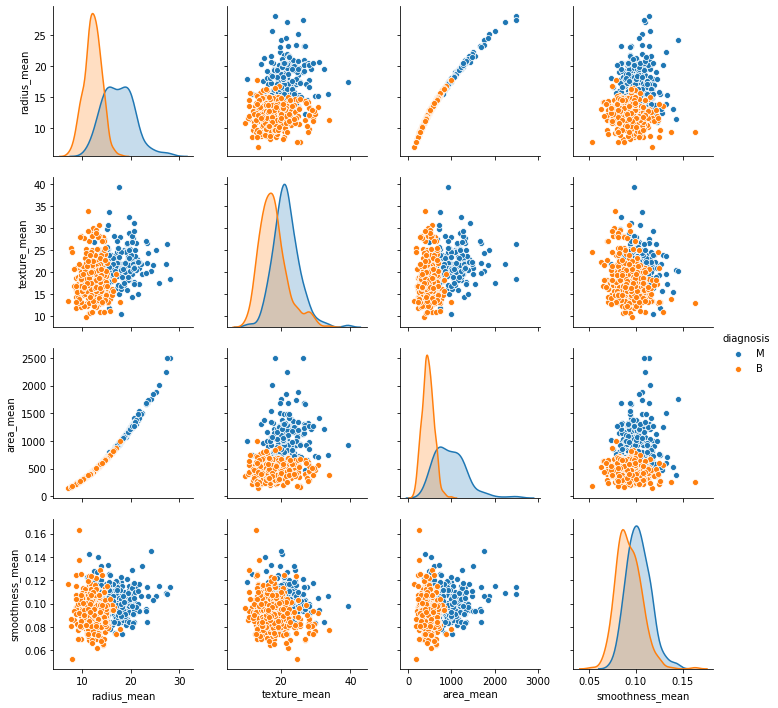

In [12]:
import seaborn as sns
sns.pairplot(dataset, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean'])

To prepare the dataset for SVM algorithms, I'd suggest doing three things:

1.  Check for NA values.  Previously, I've pretty much ignored this step but for your own datasets you may want to do so to decide how to deal with them.

2.  Decide what data goes into your X and y variables.  

3.  Ensure that the label categories are numeric.

4.  Create training and test datasets.


In [13]:
dataset.isnull().sum()
dataset.isna().sum()

ID                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
conc_mean            0
conc_points_mean     0
symmetry_mean        0
fractral_mean        0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
conc_se              0
conc_points_se       0
symmetry_se          0
fractral_se          0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
conc_worst           0
conc_points_worst    0
symmetry_worst       0
fractral_worst       0
dtype: int64

In [14]:
X = dataset.iloc[:, 2:32].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [15]:
Y = dataset.iloc[:,1].values
Y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [16]:
# You've learned one way of doing this previously in our Naive Bayes tutorial.
# Here is another nifty way of converting labels to numerical values.

#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [18]:
X_train.shape

(426, 30)

In [19]:
X_test.shape

(143, 30)

In [20]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.21395901,  0.3125461 , -0.14355187, ...,  1.37043754,
         1.08911166,  1.53928319],
       [-0.26750714,  1.461224  , -0.32955207, ..., -0.84266106,
        -0.71577388, -0.88105993],
       [-0.03922298, -0.86770223, -0.10463112, ..., -0.505318  ,
        -1.20298225, -0.92494342],
       ...,
       [-0.51270124, -1.69096186, -0.54095317, ..., -0.12632201,
         0.33773512, -0.42872244],
       [-0.17732081, -2.01395163, -0.17345939, ..., -0.62875108,
        -0.29500302, -0.65432858],
       [ 1.5305829 , -0.26300709,  1.57961296, ...,  1.6694843 ,
         1.18085869,  0.48889253]])

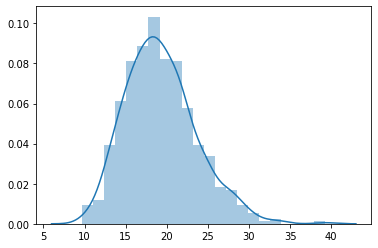

In [23]:
sns.distplot(X[:,1])

In [25]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
Y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [28]:
cm

array([[88,  2],
       [ 3, 50]], dtype=int64)

Discuss the success of this model for predicting malignant and benign tumors.


Conceptual Review Questions:
1.  What is is a hyperplane in SVM and how is it used?
    - The hyperplane is the line that separates classes in the model. In cases of 3D data fitting, the line becomes a plane, where instead of a line splitting the classes, it is a plane. SVM is all about fitting the hyperplane to the data, and we want to put the hyperplane in a spot that is the best possible division for classes.
2.  What are two tuning parameters that can be used for SVM and how do they impact the model in terms of overfitting?
    - The C parameter affects how the model captures missed points. A high C value will move the hyperplane so that no data point is misclassified. A low C value will not move the hyperplane and it will allow a point to be misclassified. A high C value results in overfitting because it does not maximize the margin which can lead to misclassification and a lower quality model. 
    - The gamma parameter affects the complexity of the model. A small gamma allows misclassifications. A large gamma is more complex and results in overfitting of the model. 
3.  What are the pros and cons of SVMs?
    - Pros: works good with multidimensional data, the hyperplane is only affected by the support vectors so outliers have less impact, it is the best algorithm for when classes are separable
    - Cons: It does not work good if the classes overlap, tuning the parameters can be tricky